# Capstone Project 3 Jonathan Odilo

## Bike Sharing

__Latar Belakang__

Bike Sharing adalah sistem peminjaman sepeda dimana proses dari peminjaman hingga pengembalian otomatis. Sistem ini sudah banyak diadopsi dengan jumlah sepeda rental mencapai lebih dari 500 ribu pada lebih dari 500 tempat peminjaman dan sudah menjadi bagian tak terpisahkan dari moda transportasi masyarakat di kota

__Masalah__

Pemakaian sepeda dipengaruhi oleh berbagai hal diantaranya cuaca dan waktu. Suhu, kelembapan, dan hujan merupakan variabel yang cukup sensitif yang dapat merubah keputusan pelanggan untuk menggunakan sepeda. Bike Sharing merilis data mengenai pengguna selama 2 tahun lengkap dnegan data cuaca pada waktu tersebut.

Prediksi banyaknya penggunaan sepeda bermanfaat untuk sistem Bike Sharing terkait berapa banyak sepeda yang harus disediakan pada hari tersebut dan perkiraan perawatan yang dibutuhkan.

__Pertanyaan__

Apakah suhu, kelembapan, musim liburan, waktu, cuaca, dan jam berpengaruh pada banyaknya pengguna pada 1 hari?

__Hipotesis__

- Suhu berpengaruh pada banyaknya pengguna dalam 1 hari
- Kelembapan berpengaruh pada banyaknya pengguna dalam 1 hari
- Musim berpengaruh pada banyaknya pengguna dalam 1 hari
- Liburan berpengaruh pada banyaknya pengguna dalam 1 hari
- Cuaca berpengaruh pada banyaknya pengguna dalam 1 hari

__Analisis__

Analisis akan dilakukan dengan regresi linier, KNN, Decision Tree, Random Forest, XGBoost serta akan dievaluasi dengan confusion matrix, recall, precision, MAE, MSE, RMSE, MAPE. Setelah itu akan dilakukan pemilihan model terbaik untuk menjelaskan variabel apa yang berpengaruh pada pemakaian sepeda pada hari tersebut

In [97]:
#Package untuk EDA
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Package untuk data wrangling
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Package untuk pembuatan model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from xgboost import plot_tree, plot_importance

#Package untuk scaling
from sklearn.preprocessing import StandardScaler

#Package untuk evaluasi metrik model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [66]:
df = pd.read_csv('data_bike_sharing.csv')
df

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


In [68]:
pd.set_option('display.max_colwidth', 0)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,dteday,731,"[2011-12-09, 2012-06-17, 2011-06-15, 2012-03-31, 2012-07-31, 2012-10-01, 2012-08-28, 2012-01-01, 2011-10-13, 2012-06-09, 2011-06-28, 2011-12-21, 2012-01-31, 2012-02-07, 2012-05-15, 2011-01-04, 2012-02-27, 2012-08-21, 2011-02-13, 2012-07-09, 2012-12-18, 2011-06-07, 2012-09-26, 2012-08-20, 2011-02-17, 2012-05-08, 2012-06-26, 2011-09-02, 2011-03-29, 2012-06-16, 2011-09-17, 2011-07-10, 2011-02-02, 2012-09-23, 2011-02-25, 2011-03-12, 2011-05-09, 2012-08-26, 2011-03-31, 2012-03-22, 2012-08-24, 2012-05-31, 2012-09-08, 2011-06-25, 2011-10-09, 2011-05-05, 2012-05-14, 2012-07-22, 2011-04-02, 2012-02-04, 2012-10-22, 2012-02-23, 2012-03-08, 2011-07-23, 2012-01-17, 2012-06-22, 2012-10-06, 2012-10-15, 2011-04-07, 2012-01-03, 2011-07-18, 2011-10-19, 2011-12-26, 2011-08-10, 2011-11-07, 2012-12-17, 2012-03-02, 2011-02-26, 2011-08-22, 2011-03-02, 2012-01-28, 2011-10-16, 2011-12-02, 2012-02-18, 2012-11-16, 2011-11-06, 2012-05-18, 2011-04-22, 2011-01-30, 2011-08-06, 2011-07-30, 2011-01-28, 2011-02-18, 2011-04-15, 2011-11-30, 2012-01-26, 2012-06-04, 2011-11-24, 2012-11-27, 2011-01-22, 2012-04-02, 2012-07-15, 2011-03-23, 2011-12-31, 2011-03-09, 2012-01-11, 2011-02-24, 2011-01-29, 2012-01-08, 2012-04-05, ...]"
1,hum,89,"[0.62, 0.64, 0.53, 0.87, 0.55, 0.72, 0.54, 0.93, 1.0, 0.24, 0.78, 0.6, 0.38, 0.52, 0.8, 0.37, 0.3, 0.83, 0.94, 0.61, 0.73, 0.35, 0.41, 0.74, 0.49, 0.33, 0.44, 0.77, 0.89, 0.88, 0.66, 0.7, 0.71, 0.63, 0.57, 0.43, 0.39, 0.45, 0.48, 0.5, 0.34, 0.19, 0.36, 0.65, 0.81, 0.79, 0.27, 0.29, 0.67, 0.75, 0.76, 0.31, 0.4, 0.28, 0.69, 0.08, 0.32, 0.51, 0.46, 0.59, 0.58, 0.23, 0.84, 0.82, 0.47, 0.18, 0.25, 0.42, 0.86, 0.0, 0.68, 0.56, 0.16, 0.21, 0.97, 0.85, 0.26, 0.22, 0.2, 0.17, 0.1, 0.15, 0.13, 0.9, 0.92, 0.96, 0.91, 0.12, 0.14]"
2,weathersit,4,"[1, 2, 3, 4]"
3,holiday,2,"[0, 1]"
4,season,4,"[4, 2, 3, 1]"
5,atemp,65,"[0.3485, 0.5152, 0.6212, 0.697, 0.4545, 0.6515, 0.2727, 0.6061, 0.4394, 0.2576, 0.5455, 0.2273, 0.6667, 0.4091, 0.3939, 0.6364, 0.5303, 0.5, 0.3636, 0.7424, 0.3333, 0.4242, 0.5758, 0.4697, 0.5909, 0.7576, 0.6818, 0.303, 0.7727, 0.1212, 0.803, 0.3182, 0.2121, 0.7879, 0.197, 0.1515, 0.4848, 0.1818, 0.3788, 0.0909, 0.2879, 0.2424, 0.5606, 0.1667, 0.7121, 0.7273, 0.0303, 0.8333, 0.8636, 0.8788, 0.1364, 0.1061, 0.8485, 0.8182, 0.0455, 0.8939, 0.9242, 0.0152, 0.0758, 0.0606, 0.9545, 0.9091, 0.0, 1.0, 0.9848]"
6,temp,50,"[0.36, 0.54, 0.62, 0.76, 0.46, 0.7, 0.26, 0.82, 0.66, 0.44, 0.58, 0.28, 0.22, 0.4, 0.38, 0.68, 0.56, 0.72, 0.52, 0.6, 0.34, 0.42, 0.64, 0.24, 0.48, 0.8, 0.32, 0.16, 0.74, 0.88, 0.3, 0.14, 0.9, 0.18, 0.06, 0.2, 0.5, 0.08, 0.78, 0.84, 0.04, 0.86, 0.12, 0.94, 0.1, 0.92, 0.96, 0.02, 0.98, 1.0]"
7,hr,24,"[16, 4, 23, 8, 18, 0, 22, 9, 5, 7, 14, 15, 21, 20, 11, 3, 13, 19, 6, 12, 1, 2, 10, 17]"
8,casual,305,"[24, 2, 17, 19, 99, 6, 20, 13, 219, 1, 11, 9, 0, 110, 51, 7, 10, 45, 30, 87, 5, 15, 60, 49, 122, 254, 81, 80, 220, 46, 36, 14, 3, 48, 31, 310, 32, 72, 26, 21, 142, 245, 16, 8, 58, 126, 47, 62, 12, 93, 27, 74, 28, 55, 50, 132, 68, 75, 29, 18, 168, 57, 61, 283, 148, 43, 4, 138, 264, 71, 121, 41, 186, 44, 39, 237, 225, 226, 224, 118, 22, 170, 162, 35, 54, 84, 200, 116, 117, 38, 53, 65, 37, 25, 196, 78, 113, 66, 33, 253, ...]"
9,registered,742,"[226, 16, 90, 126, 758, 39, 196, 27, 5, 315, 20, 278, 273, 127, 74, 48, 192, 110, 223, 652, 432, 808, 188, 119, 32, 157, 118, 141, 49, 134, 21, 227, 437, 50, 101, 23, 212, 1, 142, 171, 474, 8, 83, 233, 155, 370, 41, 43, 4, 88, 156, 99, 169, 400, 237, 7, 72, 59, 109, 228, 17, 148, 6, 26, 73, 100, 247, 91, 293, 95, 222, 383, 168, 79, 176, 146, 216, 369, 220, 22, 338, 3, 11, 123, 180, 112, 42, 181, 618, 209, 374, 467, 128, 179, 67, 104, 33, 413, 14, 19, ...]"


__Tidak ada nilai missing pada data ini, lanjut ke EDA__

In [75]:
display(df.describe())
display(df.describe(include='object'))

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000


,dteday
count,12165
unique,731
top,2011-08-09
freq,22


__Pada feature engineering, diputuskan untuk mengambil seluruh variabel kecuali tanggal, karena meskipun tanggal dapat mencerminkan musim dan cuaca, namun variabel lain lebih akurat dalam penggambaran sehingga pada dataframe dft tanggal di drop__

In [76]:
dft = df.drop('dteday', axis=1)
dft

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...
12160,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,0.77,2,0,2,0.4242,0.42,2,14,55,69


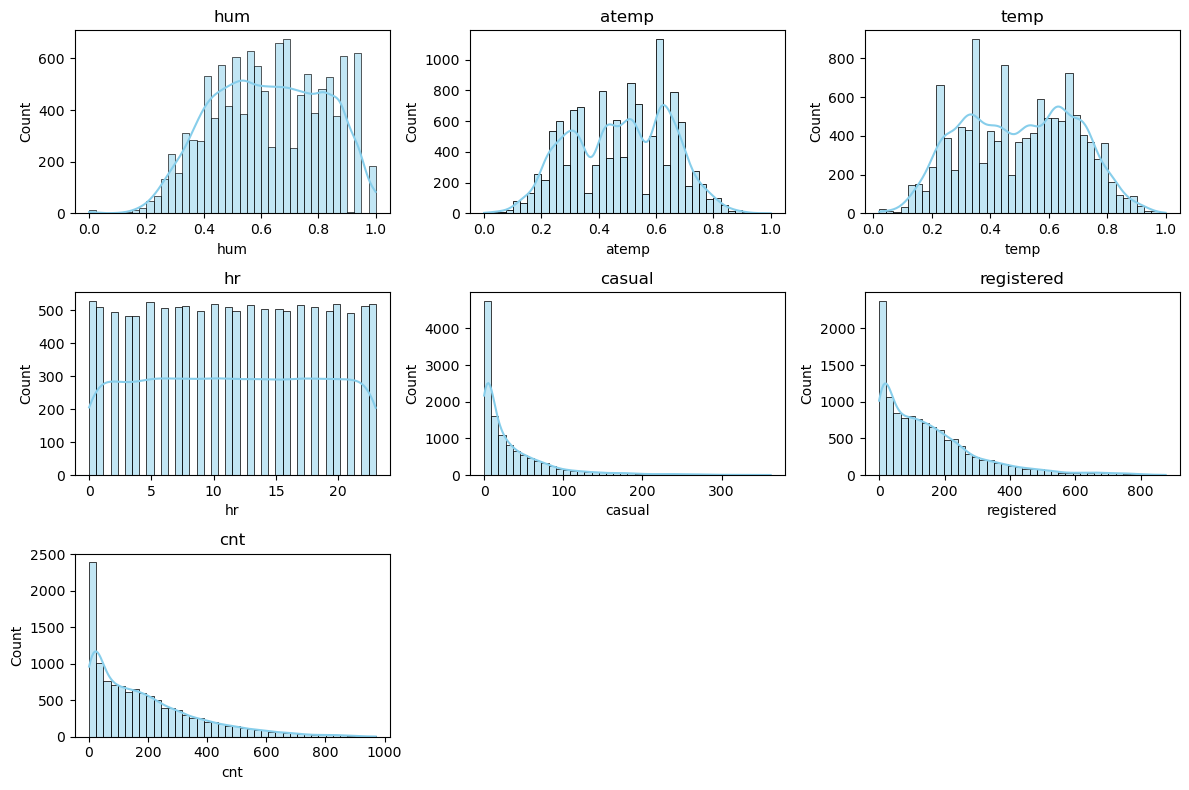

In [77]:
cols_to_plot = [col for col in dft.columns if col not in ['season', 'weathersit', 'holiday']]

plt.figure(figsize=(12, 8))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(dft[col], bins=40, kde=True, color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.show()

In [78]:
num_cols = [col for col in dft.columns if col not in ['season', 'weathersit', 'holiday']]

def outlier_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

outlier_counts = {}

for col in num_cols:
    lower, upper = outlier_bounds(dft[col])
    lower_outliers = (dft[col] < lower).sum()
    upper_outliers = (dft[col] > upper).sum()
    total_outliers = lower_outliers + upper_outliers
    outlier_counts[col] = {
        'Lower Bound': lower,
        'Upper Bound': upper,
        'Lower Outliers': lower_outliers,
        'Upper Outliers': upper_outliers,
        'Total Outliers': total_outliers
    }

outlier_df = pd.DataFrame(outlier_counts).T
print(outlier_df)

            Lower Bound  Upper Bound  Lower Outliers  Upper Outliers  \
hum         0.00500      1.24500      14.0            0.0              
atemp      -0.09855      1.05305      0.0             0.0              
temp       -0.14000      1.14000      0.0             0.0              
hr         -12.00000     36.00000     0.0             0.0              
casual     -63.50000     116.50000    0.0             847.0            
registered -245.00000    499.00000    0.0             470.0            
cnt        -323.00000    645.00000    0.0             338.0            

            Total Outliers  
hum         14.0            
atemp       0.0             
temp        0.0             
hr          0.0             
casual      847.0           
registered  470.0           
cnt         338.0           


__Outliers pada humidity memiliki nilai yang tidak logis sehingga perlu diekslusi, sementara itu pada peminjam (casual, registered, total) karena merupakan data yang penting, tetap dipertahankan__

In [79]:
dft = dft[(dft['hum'] >= 0.005) & (dft['hum'] <= 1.245)]
dft

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...
12160,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,0.77,2,0,2,0.4242,0.42,2,14,55,69


C:\Users\USER\AppData\Local\Temp\ipykernel_2784\4273795510.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=dft, palette='viridis')
C:\Users\USER\AppData\Local\Temp\ipykernel_2784\4273795510.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=dft, palette='viridis')
C:\Users\USER\AppData\Local\Temp\ipykernel_2784\4273795510.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=dft, palette='viridis')


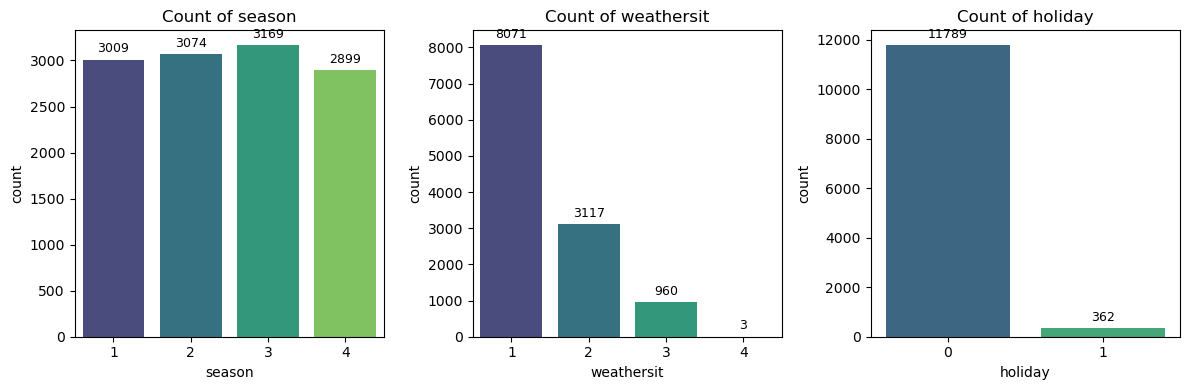

In [80]:
cat_cols = ['season', 'weathersit', 'holiday']

plt.figure(figsize=(12, 4))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    ax = sns.countplot(x=col, data=dft, palette='viridis')
    plt.title(f"Count of {col}")

    # Add count labels
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 3),
                    textcoords='offset points')
    plt.tight_layout()

plt.show()

__Karena weathersit klasifikasi 4 hanya ada 3 subjek, weathersit 3 sudah cukup untuk representasi cuaca jelek. Sehingga data di drop, namun untuk holiday, karena cukup penting dan masih cukup banyak meskipun imbalanced, dipertahankan__

In [81]:
indices_to_drop = df[df['weathersit'] == 4].index
df.drop(indices_to_drop, inplace=True)
df

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


<Axes: >

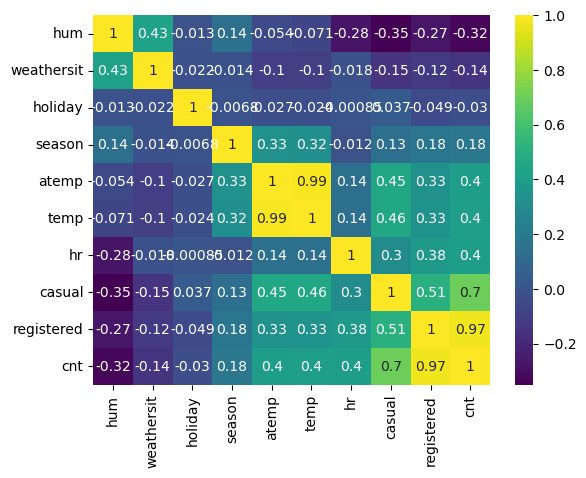

In [82]:
sns.heatmap(dft.corr(), annot=True, cmap='viridis')

__One-hot Encoding variabel ordinal__

In [83]:
dft_encoded = pd.get_dummies(dft, columns=['weathersit', 'season'], drop_first=False)
dft_encoded

,hum,holiday,atemp,temp,hr,casual,registered,cnt,weathersit_1,weathersit_2,weathersit_3,weathersit_4,season_1,season_2,season_3,season_4
0,0.62,0,0.3485,0.36,16,24,226,250,True,False,False,False,False,False,False,True
1,0.64,0,0.5152,0.54,4,2,16,18,True,False,False,False,False,True,False,False
2,0.53,0,0.6212,0.62,23,17,90,107,True,False,False,False,False,True,False,False
3,0.87,0,0.3485,0.36,8,19,126,145,False,True,False,False,False,True,False,False
4,0.55,0,0.6970,0.76,18,99,758,857,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,0.75,0,0.2273,0.24,7,14,243,257,True,False,False,False,True,False,False,False
12161,0.62,0,0.7424,0.78,0,39,63,102,True,False,False,False,False,False,True,False
12162,0.60,1,0.2121,0.24,5,0,6,6,False,True,False,False,True,False,False,False
12163,0.77,0,0.4242,0.42,2,14,55,69,False,True,False,False,False,True,False,False


__Pada analisis data, variabel respons yang ditargetkan adalah total peminjaman `cnt` untuk mendapatkan insight mengenai variabel mana saja yang berpengaruh pada jenis-jenis peminjaman tersebut__

In [84]:
X = dft_encoded[['hum', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'season_1', 'season_2', 'season_3', 'season_4', 'holiday', 'atemp', 'temp',	'hr']]
y1 = dft_encoded['casual']
y2 = dft_encoded['registered']
y3 = dft_encoded['cnt']

In [85]:
#Split training dan test dengan test size
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)

__Pembuatan model dan evaluasi model regresi linier, KNN, Decision Tree, Random Forest, XGBoost serta evaluasi dengan confusion matrix, recall, precision, MAE, MSE, RMSE, MAPE__

In [91]:
#Siapkan model dan 
models = {
    'LinearRegression': Pipeline([
        ('scaler', StandardScaler()), 
        ('lr', LinearRegression())
    ]),
    'KNN': Pipeline([
        ('scaler', StandardScaler()), 
        ('knn', KNeighborsRegressor(n_neighbors=5))
    ]),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}
def mape_safe(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # where y_true == 0, exclude from MAPE denom or add small epsilon
    mask = y_true != 0
    if mask.sum() == 0:
        return np.nan
    return (np.abs((y_true[mask] - y_pred[mask]) / y_true[mask]).mean()) * 100

results = {}
for name, model in models.items():
    model.fit(X3_train, y3_train)
    preds = model.predict(X3_test)
    
    mae = mean_absolute_error(y3_test, preds)
    mse = mean_squared_error(y3_test, preds)
    rmse = np.sqrt(mse)
    mape = mape_safe(y3_test, preds)
    
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE(%)': mape
    }

# Display results
results_df = pd.DataFrame(results).T.round(4)
print("\nSummary results:")
print(results_df)


Summary results:
                       MAE         MSE      RMSE   MAPE(%)
LinearRegression  103.3285  19623.9092  140.0854  300.6476
KNN               73.4199   12214.9741  110.5214  112.7421
DecisionTree      86.4232   18776.5893  137.0277  97.5296 
RandomForest      68.7708   11144.6852  105.5684  95.2158 
XGBoost           65.9962   9719.6845   98.5885   101.3633


__Berdasarkan model training dengan target, XGBoost merupakan algoritma terbaik diantara seluruhnya dari MAE, MSE, dan RMSE, sehingga dilakukan hyperparameter tuning pada model XGBoost__

In [93]:
xgb_model = XGBRegressor(random_state=42, verbosity=0)

param_grid = {
    'n_estimators': [100, 200, 300],       # number of boosting rounds
    'max_depth': [3, 5, 7],                # tree depth
    'learning_rate': [0.01, 0.05, 0.1],    # shrinkage rate
    'subsample': [0.8, 1.0],               # row sampling
    'colsample_bytree': [0.8, 1.0]         # feature sampling
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # for regression
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X3_train, y3_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best RMSE: {(-grid_search.best_score_)**0.5:.4f}")

best_xgb = grid_search.best_estimator_
preds = best_xgb.predict(X3_test)

mae = mean_absolute_error(y3_test, preds)
mse = mean_squared_error(y3_test, preds)
rmse = mse ** 0.5
print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best RMSE: 98.7842
Test MAE: 64.3561
Test RMSE: 95.8152


__Parameter terbaik untuk XGBoost adalah 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8__

__Implementasi Parameter terbaik XGBoost pada keseluruhan data__

In [96]:
best_params = grid_search.best_params_
best_xgb_final = XGBRegressor(**best_params, random_state=42, verbosity=0)
best_xgb_final.fit(X, y3)

preds = model.predict(X3_test)
    
mae = mean_absolute_error(y3_test, preds)
mse = mean_squared_error(y3_test, preds)
rmse = np.sqrt(mse)
mape = mape_safe(y3_test, preds)
    
results = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE(%)': mape
    }

print(results)

{'MAE': 65.99624551389503, 'MSE': 9719.684453870854, 'RMSE': 98.58846004411903, 'MAPE(%)': 101.36332101418579}


C:\Users\USER\AppData\Local\Temp\ipykernel_2784\3721398208.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


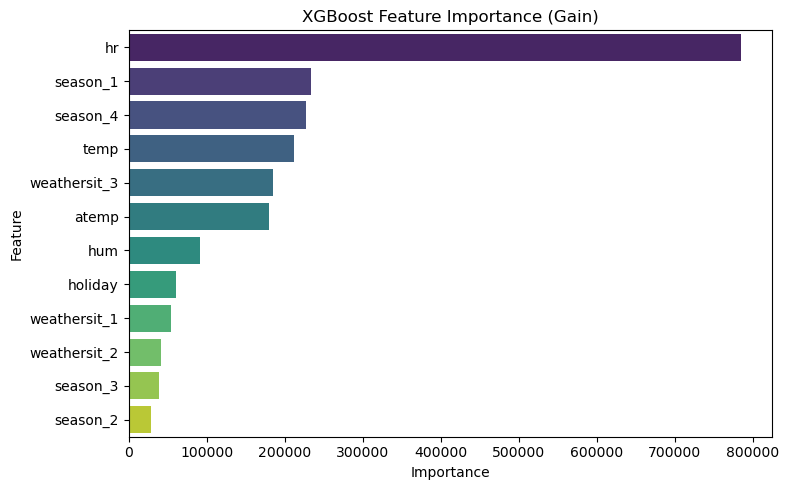

In [101]:
importance_dict = best_xgb_final.get_booster().get_score(importance_type='gain')
importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Importance': list(importance_dict.values())
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("XGBoost Feature Importance (Gain)")
plt.tight_layout()
plt.show()

__Kesimpulan__

Feature yang paling berpengaruh pada jumlah peminjaman sepeda pada hari tersebut adalah berapa lama jam operasional pada hari tersebut. Musim dingin dan musim gugur juga memiliki pengaruh yang cukup besar pada jumlah peminjaman dalam 1 hari. Temperatur juga memiliki pengaruh pada jumlah peminjaman sepeda di hari yang bersangkutan.

Kelemahan pada model ini adalah MAPE yang sangat tinggi (101%) sehingga perlu dilakukan pembuatan model dengan variabel tambahan untuk memperbaiki metrik evaluasi model agar model menjadi lebih valid

Implementasi penambahan jam dan penambahan jumlah sepeda pada poin peminjaman saat musim gugur dan musim dingin untuk memenuhi kebutuhan peminjaman di hari tersebut

__Rekomendasi__
1. Dilakukan penambahan jam operasional pada Bike Sharing
2. Dilakukan penambahan sepeda pada musim gugur dan musim dingin
3. Untuk memperbaiki model, ditambahkan variabel-variabel lain untuk meningkatkan validitas dari model